# Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_palette('flare')
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Exploring the data

In [2]:
data = pd.read_csv('C:/Users/sogor/OneDrive/Documents/DataScientist_practice/datasets/Automobile_data.csv')
data.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,51.0,2293,ohc,four,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
66,0,?,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200,31,39,18344
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
96,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,1971,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


# Data Cleaning

In [3]:
# Replacing -1 and '?' with NaN values

data = data.replace(-1, np.NaN)
data = data.replace('?', np.NaN)

In [4]:
# Due to lack of information, I am dropping a few columns because I do not know what they mean
data.drop(['symboling', 'normalized-losses'], axis=1, inplace=True)

In [5]:
data.dtypes

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# Converting all numeric columns to be numeric

for c in ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    data[c] = data[c].astype(float)

In [7]:
#Checking for missing values
data.isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [8]:
# Filling the numerical features with their mean

for c in data.columns:
    if data.dtypes[c] != 'object' and data.isna().sum()[c] > 0:
        data[c] = data[c].fillna(data[c].mean())

# Brief visulization

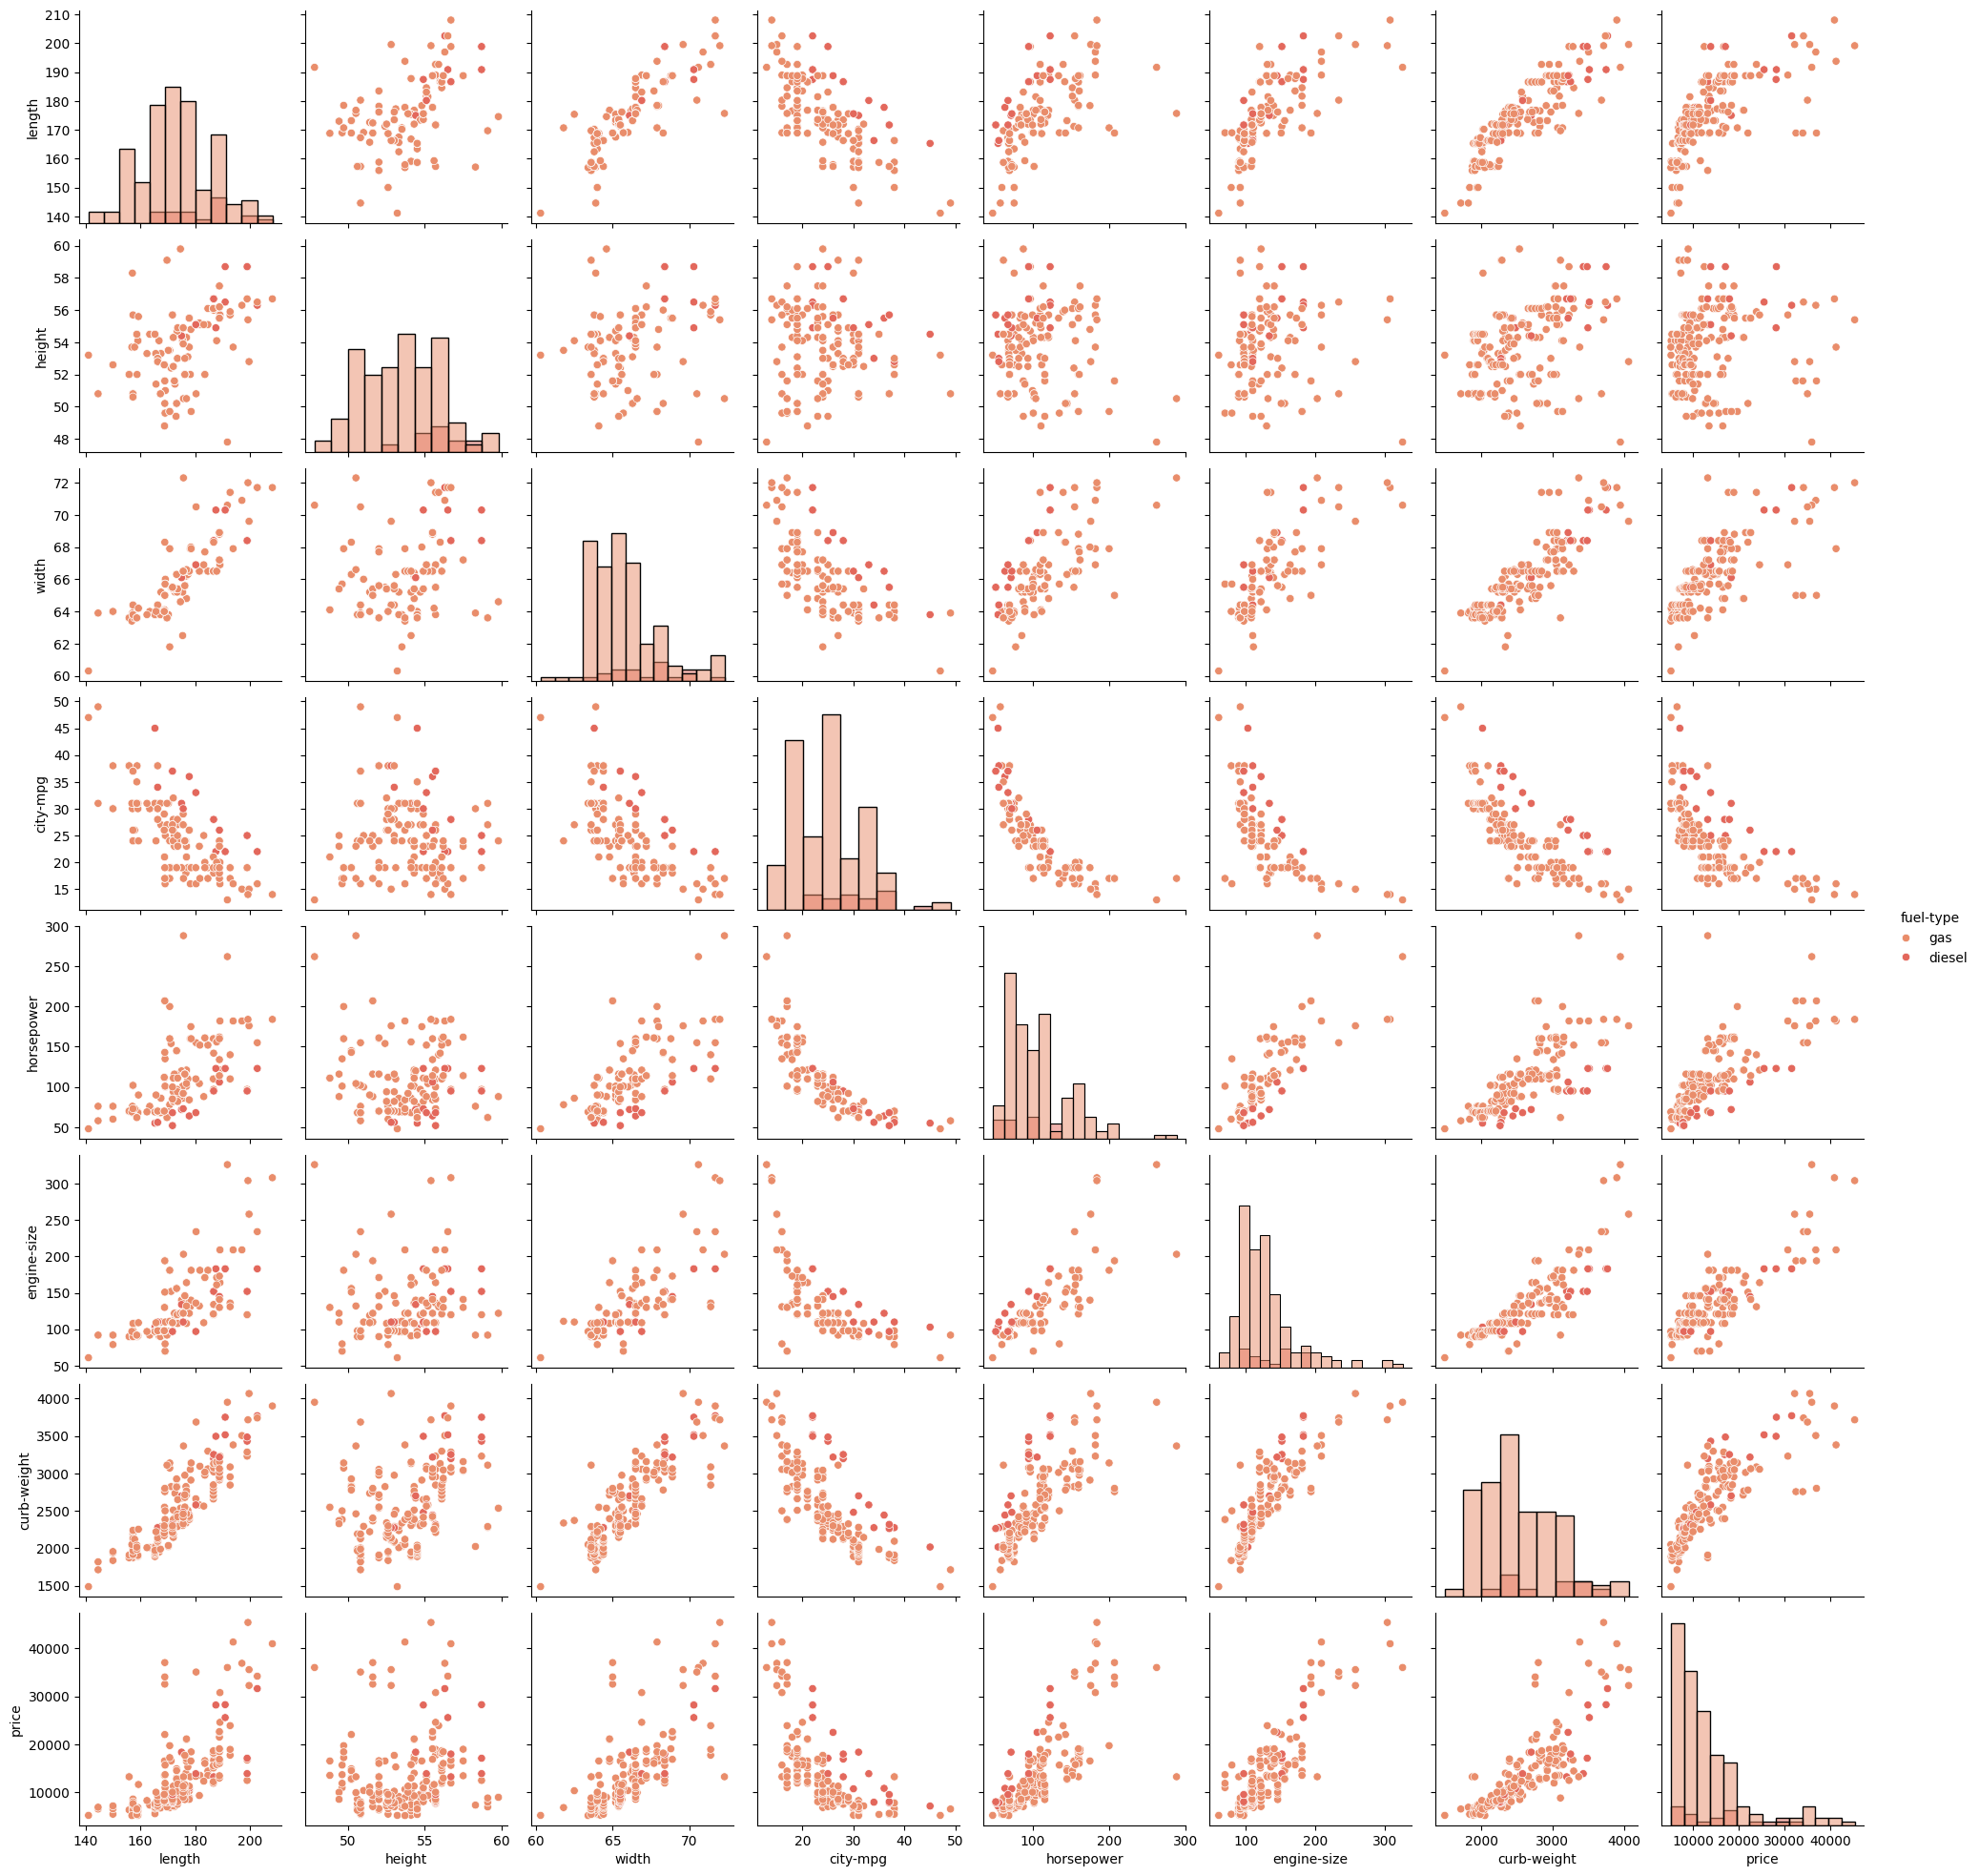

In [9]:
g = sns.pairplot(data[["length", "height", "width", "city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

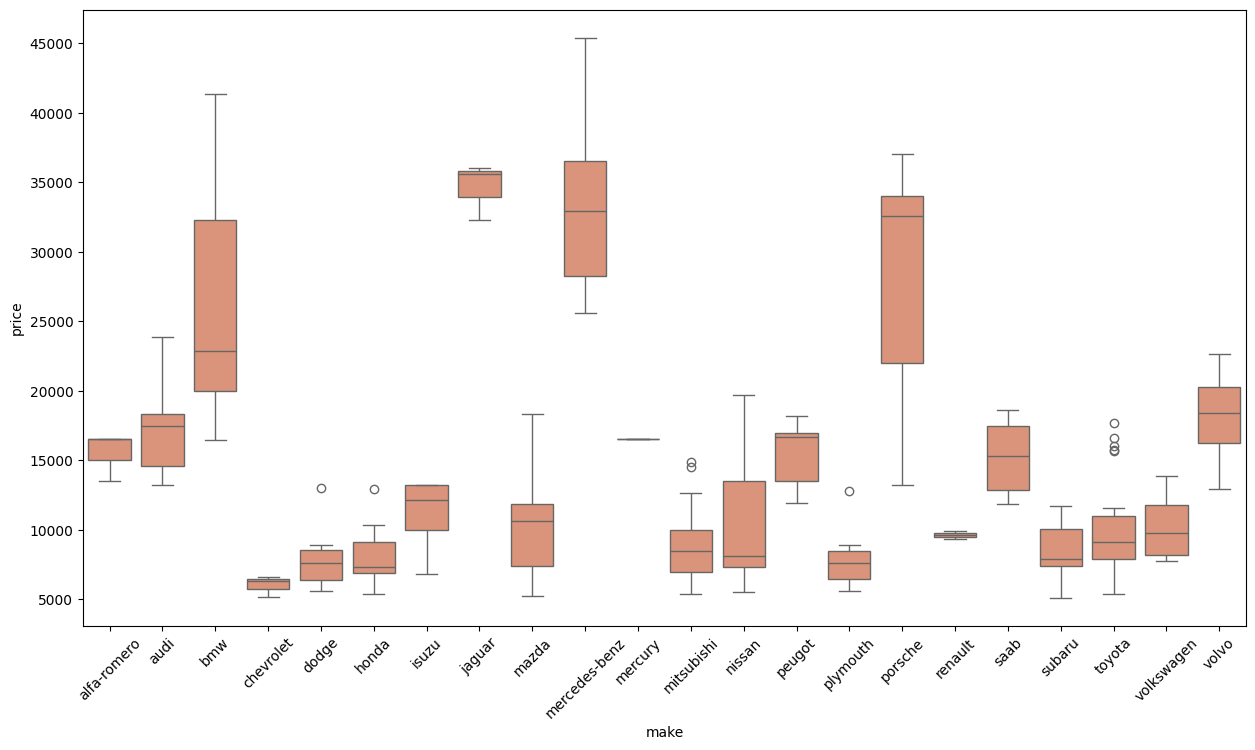

In [10]:
plt.figure(figsize=(15, 8))

sns.boxplot(x='make', y='price', data=data)
plt.xticks(rotation=45)

plt.show()

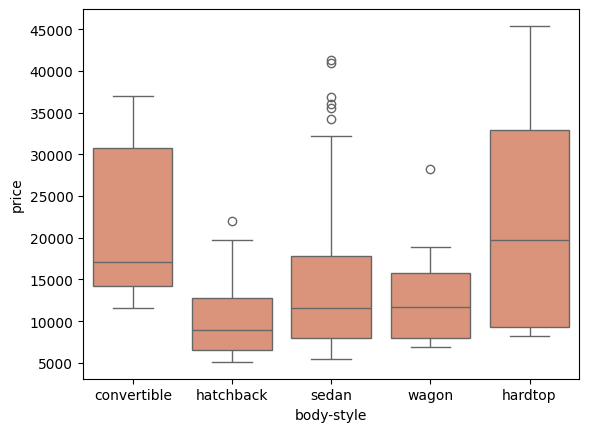

In [11]:
sns.boxplot(x='body-style', y='price', data=data)
plt.show()

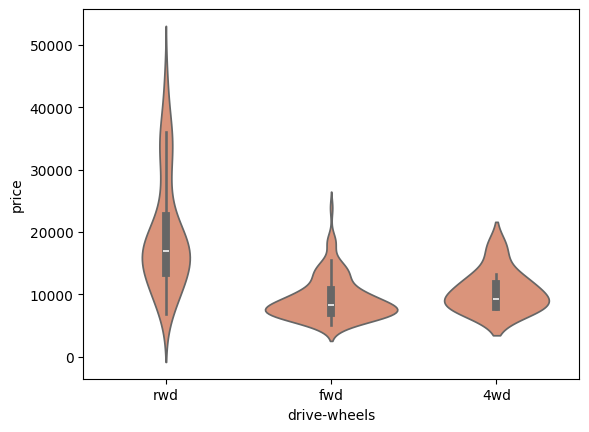

In [12]:
sns.violinplot(x='drive-wheels', y='price', data=data)
plt.show()

In [13]:
# Listing all the unique values for each categorical feature

{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'make': ['alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'fuel-type': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'num-of-doors': ['two', 'four', nan],
 'body-style': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drive-wheels': ['rwd', 'fwd', '4wd'],
 'engine-location': ['front', 'rear'],
 'engine-type': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'],
 'num-of-cylinders': ['four',
  'six',
  'five',
  'three',
  'twelve',
  'two',
  'eight'],
 'fuel-system': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']}

In [14]:
# Encoding Ordinal Features

numeric_ordering = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

data['num-of-cylinders'] = data['num-of-cylinders'].replace(numeric_ordering)

In [15]:
def binary_encoder(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    
    return df 

In [16]:
binary_features = ['fuel-type', 'aspiration', 'engine-location', 'num-of-doors']
binary_postive_value = ['diesel', 'turbo', 'front', 'four']
 
data = binary_encoder(data, columns=binary_features, positive_values=binary_postive_value)

In [17]:
print(f'Total missing values after preprocessing steps: {data.isnull().sum().sum()}')

Total missing values after preprocessing steps: 0


In [18]:
def one_hot_encoder(df, columns, prefixes):
    df = df.copy() 
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
        
    return df  

In [19]:
one_hot_features = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
feature_prefixes = ['MK', 'BS', 'DW', 'ET', 'FS'] 

data = one_hot_encoder(data, columns=one_hot_features, prefixes=feature_prefixes)

In [20]:
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)

In [21]:
data

,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,MK_alfa-romero,MK_audi,MK_bmw,MK_chevrolet,MK_dodge,MK_honda,MK_isuzu,MK_jaguar,MK_mazda,MK_mercedes-benz,MK_mercury,MK_mitsubishi,MK_nissan,MK_peugot,MK_plymouth,MK_porsche,MK_renault,MK_saab,MK_subaru,MK_toyota,MK_volkswagen,MK_volvo,BS_convertible,BS_hardtop,BS_hatchback,BS_sedan,BS_wagon,DW_4wd,DW_fwd,DW_rwd,ET_dohc,ET_dohcv,ET_l,ET_ohc,ET_ohcf,ET_ohcv,ET_rotor,FS_1bbl,FS_2bbl,FS_4bbl,FS_idi,FS_mfi,FS_mpfi,FS_spdi,FS_spfi
0,0,0,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,0,1,1,1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,0,0,1,1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,1,1,1,1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Splitting/Scaling

In [22]:
y = data['price']
X = data.drop('price', axis=1) 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [25]:
print('Independent feature sets shape:\n---------------------------')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

print('\nTarget feature sets shape:\n---------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Independent feature sets shape:
---------------------------
X_train shape: (143, 63)
X_test shape: (62, 63)

Target feature sets shape:
---------------------------
y_train shape: (143,)
y_test shape: (62,)


# Model Building

### XGBoostRegressor 

In [26]:
base_model = xgb.XGBRegressor()
base_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred_alfa = base_model.predict(X_test)
print(f"R^2 score for the base model: {r2_score(y_test, y_pred_alfa)}") 

R^2 score for the base model: 0.7251835332602707


In [28]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.6}
Best R^2 score:  0.9206698702325911


In [29]:
best_params = grid_search.best_params_

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=True)

[0]	validation_0-rmse:7697.03202
[1]	validation_0-rmse:7621.35451
[2]	validation_0-rmse:7553.28187
[3]	validation_0-rmse:7480.67831
[4]	validation_0-rmse:7405.11389
[5]	validation_0-rmse:7342.65202
[6]	validation_0-rmse:7271.59907
[7]	validation_0-rmse:7205.44828
[8]	validation_0-rmse:7146.80107
[9]	validation_0-rmse:7090.96154
[10]	validation_0-rmse:7048.98337
[11]	validation_0-rmse:7004.37832
[12]	validation_0-rmse:6965.31021
[13]	validation_0-rmse:6920.33565
[14]	validation_0-rmse:6861.72047
[15]	validation_0-rmse:6811.79511
[16]	validation_0-rmse:6759.52567
[17]	validation_0-rmse:6701.57893
[18]	validation_0-rmse:6660.57863
[19]	validation_0-rmse:6617.31156
[20]	validation_0-rmse:6565.30918
[21]	validation_0-rmse:6528.70301
[22]	validation_0-rmse:6472.22608
[23]	validation_0-rmse:6430.98887
[24]	validation_0-rmse:6365.99075
[25]	validation_0-rmse:6327.87926
[26]	validation_0-rmse:6284.06079
[27]	validation_0-rmse:6247.07496
[28]	validation_0-rmse:6203.51293
[29]	validation_0-rmse:6

C:\Users\sogor\miniconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[129]	validation_0-rmse:3807.26282
[130]	validation_0-rmse:3796.17743
[131]	validation_0-rmse:3791.13359
[132]	validation_0-rmse:3787.77167
[133]	validation_0-rmse:3777.67547
[134]	validation_0-rmse:3771.31785
[135]	validation_0-rmse:3763.78717
[136]	validation_0-rmse:3755.32631
[137]	validation_0-rmse:3747.42215
[138]	validation_0-rmse:3735.65017
[139]	validation_0-rmse:3722.62072
[140]	validation_0-rmse:3716.56673
[141]	validation_0-rmse:3710.01312
[142]	validation_0-rmse:3698.50004
[143]	validation_0-rmse:3692.81058
[144]	validation_0-rmse:3683.44360
[145]	validation_0-rmse:3672.93631
[146]	validation_0-rmse:3667.44208
[147]	validation_0-rmse:3661.73897
[148]	validation_0-rmse:3663.14894
[149]	validation_0-rmse:3657.66894
[150]	validation_0-rmse:3650.11839
[151]	validation_0-rmse:3648.11734
[152]	validation_0-rmse:3643.12963
[153]	validation_0-rmse:3639.18624
[154]	validation_0-rmse:3635.41471
[155]	validation_0-rmse:3627.74842
[156]	validation_0-rmse:3622.37144
[157]	validation_0-r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred = model.predict(X_test)
print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}")

R^2 score: 0.793


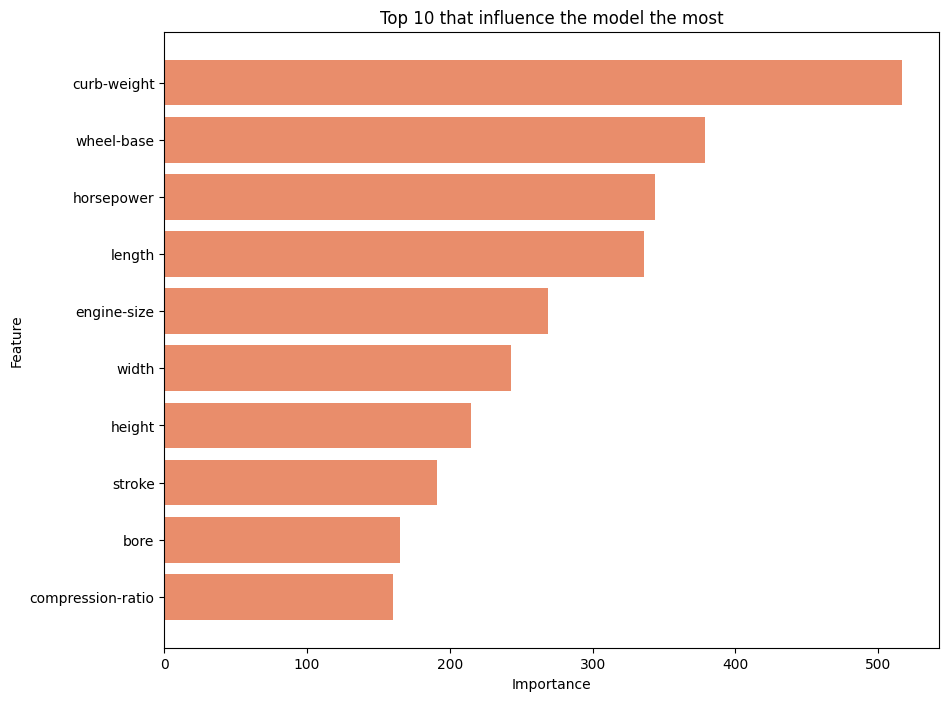

In [31]:
feature_names = data.columns

booster = model.get_booster()
importance = booster.get_score(importance_type='weight')

importance_named = {feature_names[int(k[1:])]: v for k, v in importance.items()}

importance_df = pd.DataFrame(importance_named.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top10_features = importance_df.head(10)

plt.figure(figsize=(10, 8))
plt.barh(top10_features['Feature'], top10_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 that influence the model the most')
plt.show()

### Lasso Regression 

In [32]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [33]:
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_lasso)
print(f"R^2 score on test set: {round(r2, 4)}")

R^2 score on test set: 0.7804


In [34]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best alpha found: ", grid_search.best_params_)
print("Best R^2 score from Grid Search: ", grid_search.best_score_)

Best alpha found:  {'alpha': 100}
Best R^2 score from Grid Search:  0.8670986523814301


In [35]:
best_lasso = grid_search.best_estimator_
y_pred_best_lasso = best_lasso.predict(X_test)
print(f"R^2 score on test set with best alpha: {round(r2_score(y_test, y_pred_best_lasso), 4)}")

R^2 score on test set with best alpha: 0.784


In [36]:
features = X.columns

importance = abs(best_lasso.coef_)

imp_features = {}
for i in range(len(features)):
    imp_features[features[i]] = importance[i]
    
top_10 = (sorted(imp_features.items(), key=lambda x: x[1], reverse=True)[:10])
top_10

[('engine-size', 2819.0116776520385),
 ('MK_bmw', 1920.993858931054),
 ('width', 1733.695373191901),
 ('MK_mercedes-benz', 1091.5365178167576),
 ('engine-location', 965.7616126022091),
 ('horsepower', 878.1561226864396),
 ('curb-weight', 656.0194263583636),
 ('MK_porsche', 617.6770312420779),
 ('MK_isuzu', 564.3577540887721),
 ('MK_jaguar', 532.5406102498292)]